# Sector-Level Stock Analysis Using Python

## Introduction
This project performs a comprehensive analysis of stock performance across various sectors of the S&P 500. Using Python libraries such as yfinance, pandas, matplotlib, and seaborn, we explore historical price data for 50 stocks categorized into sectors. The goal is to understand sector trends, correlations, and risk characteristics through data visualization and statistical analysis.

---

## Data Acquisition
We retrieve historical adjusted closing prices from Yahoo Finance for the selected stocks between January 2020 and December 2024. The data is then organized by sector for focused analysis.

---

## Data Cleaning and Preparation
Initial data checks confirmed the completeness of the dataset. Missing values were handled, and adjusted closing prices were converted into daily returns to standardize comparisons across stocks and sectors.

---

## Exploratory Data Analysis
We visualize stock price trends and compute daily returns to examine short-term performance. We then aggregate returns by sector and plot average daily returns, highlighting sector-specific movements over time.

---

## Cumulative Returns Analysis
By calculating cumulative returns, we simulate the growth of a hypothetical investment in each sector starting in 2020. This highlights long-term performance differences and investment growth potential across sectors.

---

## Correlation Analysis
Correlation heatmaps of sector returns reveal how closely sectors move together, identifying clusters and diversification opportunities. This is essential for portfolio construction and risk management.

---

## Volatility Analysis
We calculate annualized volatility for each sector, a key risk metric, and present it with a polar bar plot to provide an intuitive, visually appealing summary of sector risk profiles.

---

## Conclusion
This project demonstrates effective use of Python for financial data analysis, combining data retrieval, cleaning, visualization, and interpretation. The insights gained on sector performance and risk serve as a foundation for deeper portfolio analysis or machine learning applications.

---

## Future Work
- Incorporate rolling metrics such as rolling volatility and correlation  
- Extend analysis to individual stocks within sectors  
- Develop risk-adjusted performance measures like Sharpe ratios  
- Automate data updates and add interactive visualizations  


In [19]:
# Installing relevant packages

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Setting the seaborn style to whitegrid for visibility

sns.set(style="whitegrid")

In [12]:
# Creating a list called tickers using 50 popular stocks

tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK-B', 'NVDA', 'JPM', 'JNJ',
    'V', 'PG', 'UNH', 'HD', 'MA', 'DIS', 'BAC', 'XOM', 'VZ', 'ADBE',
    'NFLX', 'PYPL', 'CMCSA', 'KO', 'PFE', 'PEP', 'T', 'CSCO', 'ABT', 'CVX',
    'CRM', 'INTC', 'WMT', 'NKE', 'MRK', 'COST', 'ORCL', 'ACN', 'MDT', 'DHR',
    'MCD', 'TXN', 'NEE', 'LIN', 'LOW', 'AMGN', 'BMY', 'HON', 'QCOM', 'IBM'
]

In [13]:
# Defining a timeframe for the analysis

start_date = '2020-01-01'
end_date = '2024-12-31'

In [17]:
# Downloading the data from yahoo finance, and aligning it with the 'tickers' variable.
# Here, we are only using the variable 'Adjusted Close', as it is the fairest way to 
# compare historical stock prices

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

[*********************100%***********************]  50 of 50 completed


In [18]:
# Checking the data

print(data.shape)
print(data.head())

(1257, 50)
Ticker           AAPL        ABT         ACN        ADBE        AMGN  \
Date                                                                   
2020-01-02  72.620842  78.908424  193.477859  334.429993  202.661926   
2020-01-03  71.914833  77.946472  193.155609  331.809998  201.286133   
2020-01-06  72.487862  78.354843  191.894318  333.709991  202.830704   
2020-01-07  72.146935  77.919243  187.751328  333.390015  200.923126   
2020-01-08  73.307526  78.236847  188.119583  337.869995  201.075058   

Ticker           AMZN        BAC        BMY       BRK-B      CMCSA  ...  \
Date                                                                ...   
2020-01-02  94.900497  31.092302  52.315857  228.389999  39.359207  ...   
2020-01-03  93.748497  30.446737  51.853329  226.179993  39.046906  ...   
2020-01-06  95.143997  30.403124  52.018513  226.990005  38.751961  ...   
2020-01-07  95.343002  30.202465  52.803169  225.919998  39.161613  ...   
2020-01-08  94.598503  30.507801  

In [20]:
# Auditing the dataset

print(data.shape) # The dataset has 50 columns, and 1,257 rows
print(data.columns)
print(data.index) # The date time index looks clean, in order, with no outliers

(1257, 50)
Index(['AAPL', 'ABT', 'ACN', 'ADBE', 'AMGN', 'AMZN', 'BAC', 'BMY', 'BRK-B',
       'CMCSA', 'COST', 'CRM', 'CSCO', 'CVX', 'DHR', 'DIS', 'GOOGL', 'HD',
       'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LIN', 'LOW', 'MA', 'MCD',
       'MDT', 'META', 'MRK', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL',
       'PEP', 'PFE', 'PG', 'PYPL', 'QCOM', 'T', 'TSLA', 'TXN', 'UNH', 'V',
       'VZ', 'WMT', 'XOM'],
      dtype='object', name='Ticker')
DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)


In [21]:
# Checking for missing values

missing = data.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False)) # No missing values, and every trading day has complete data

Series([], dtype: int64)


In [22]:
# Splitting the companies into groups for visualisation purposes

categories = {
    'Tech': ['AAPL', 'MSFT', 'NVDA', 'META', 'GOOGL', 'ORCL', 'CRM'],
    'Finance': ['JPM', 'BAC', 'V', 'MA', 'PYPL', 'BRK-B'],
    'Healthcare': ['JNJ', 'PFE', 'ABT', 'MRK', 'MDT', 'BMY', 'UNH'],
    'Consumer': ['WMT', 'KO', 'PEP', 'NKE', 'MCD', 'DIS', 'HD'],
    'Energy_Industrials': ['XOM', 'CVX', 'HON', 'LIN', 'NEE', 'T', 'IBM']
}

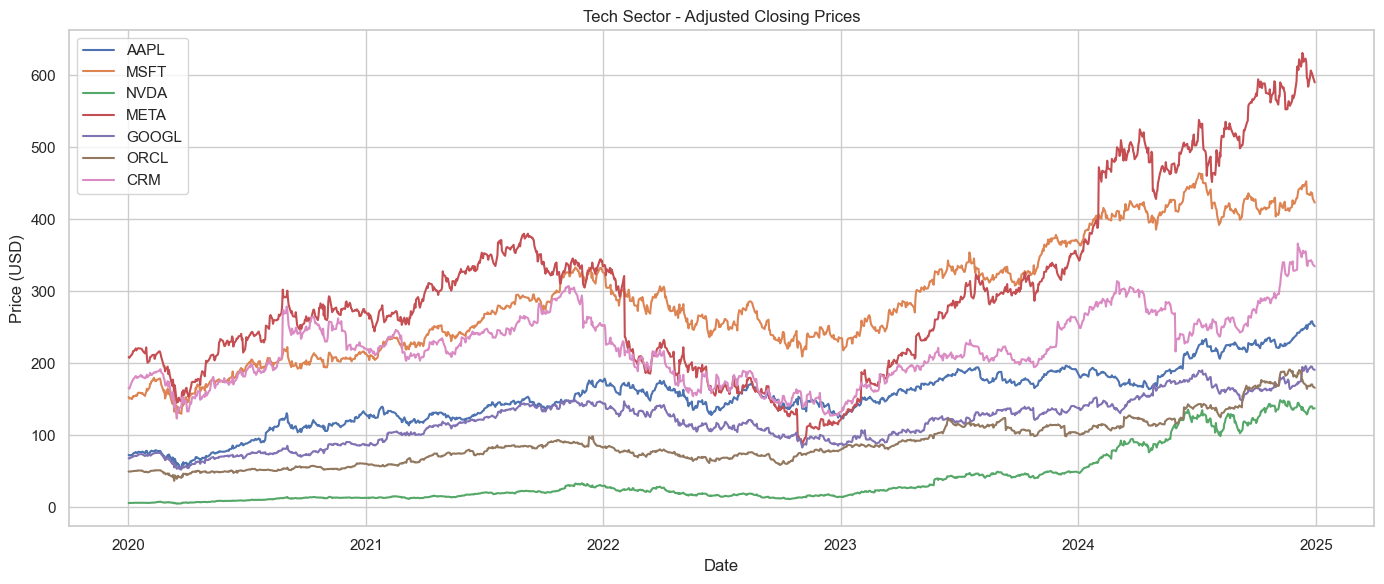

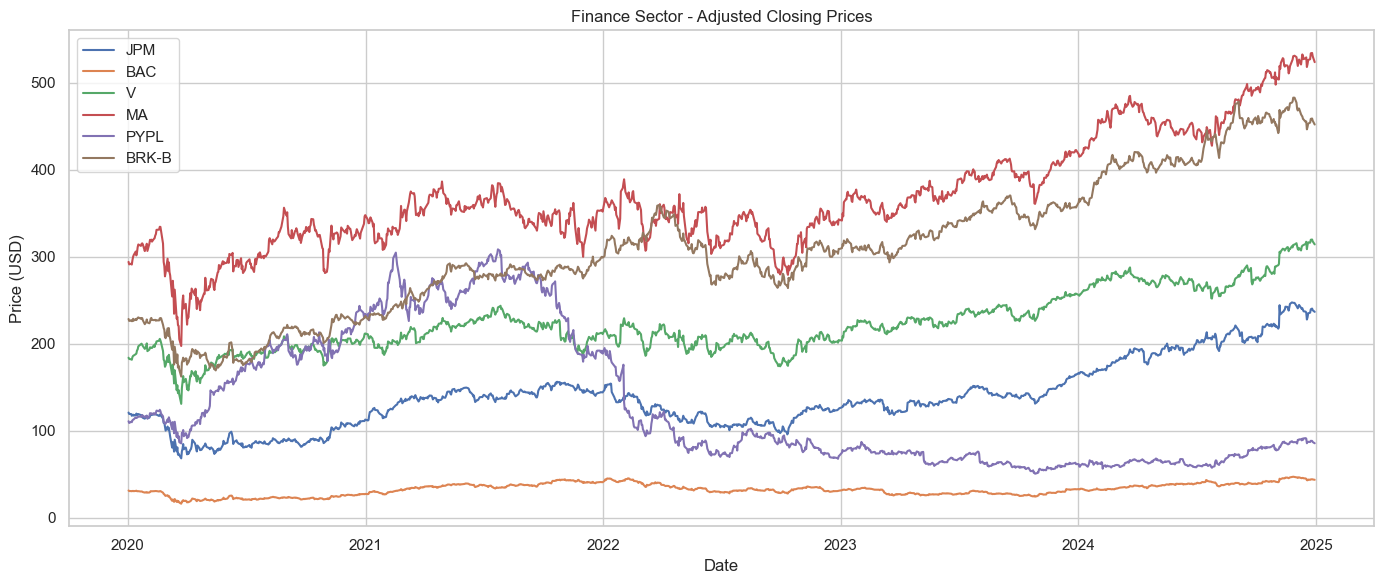

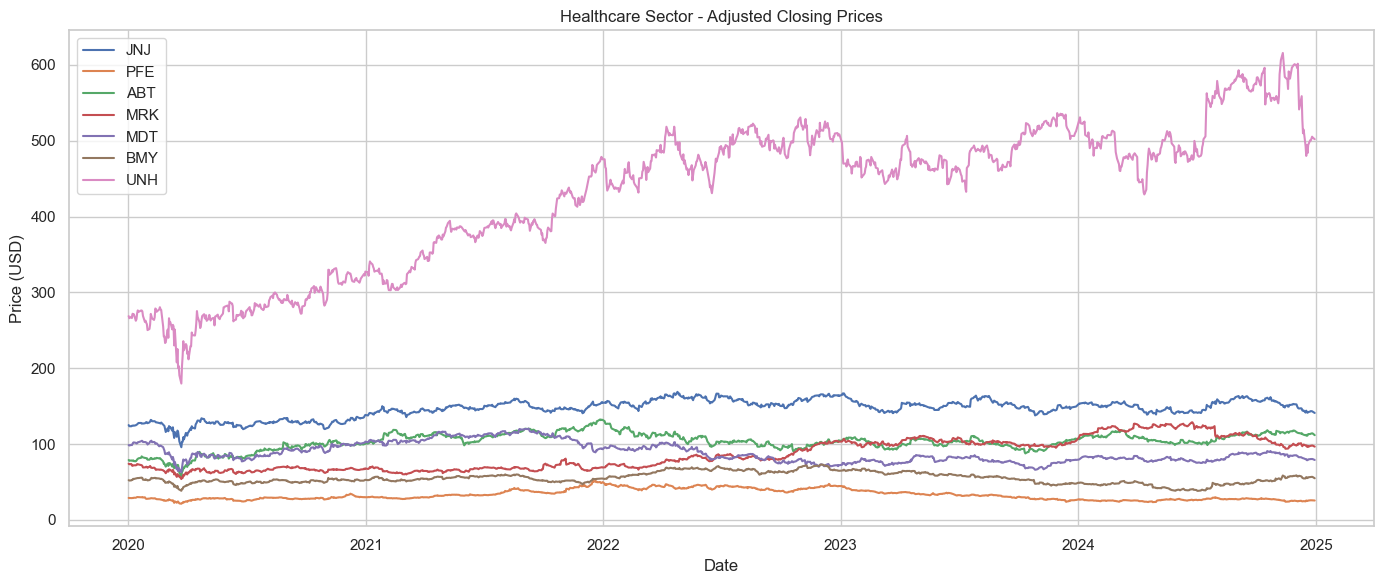

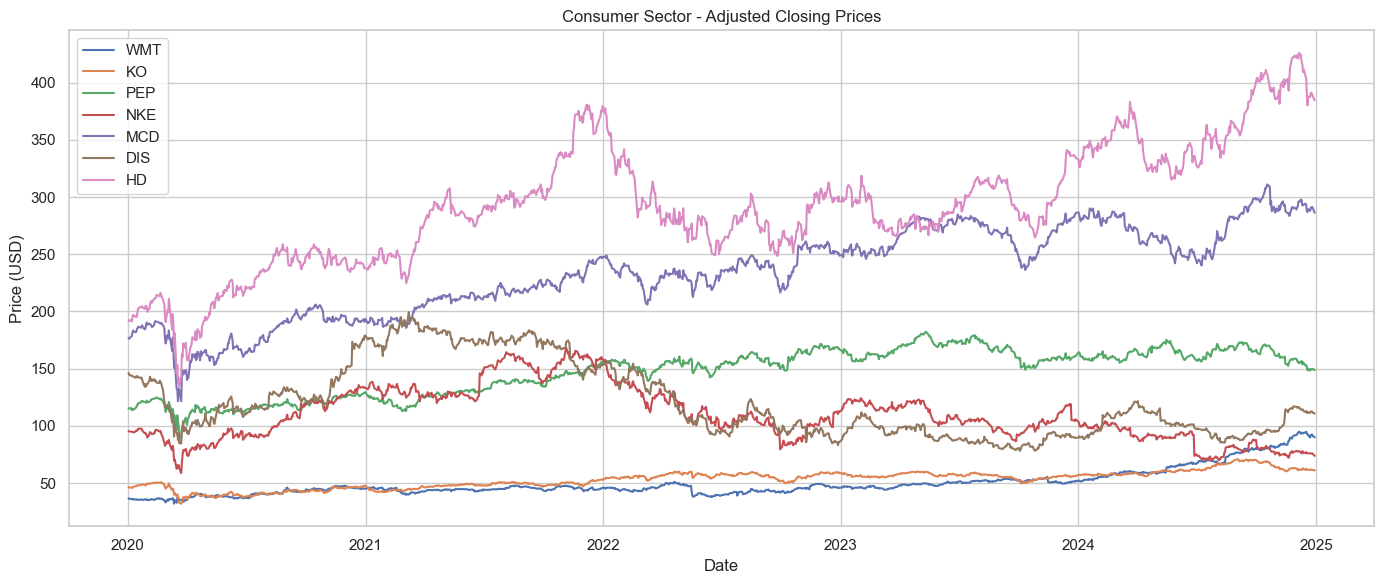

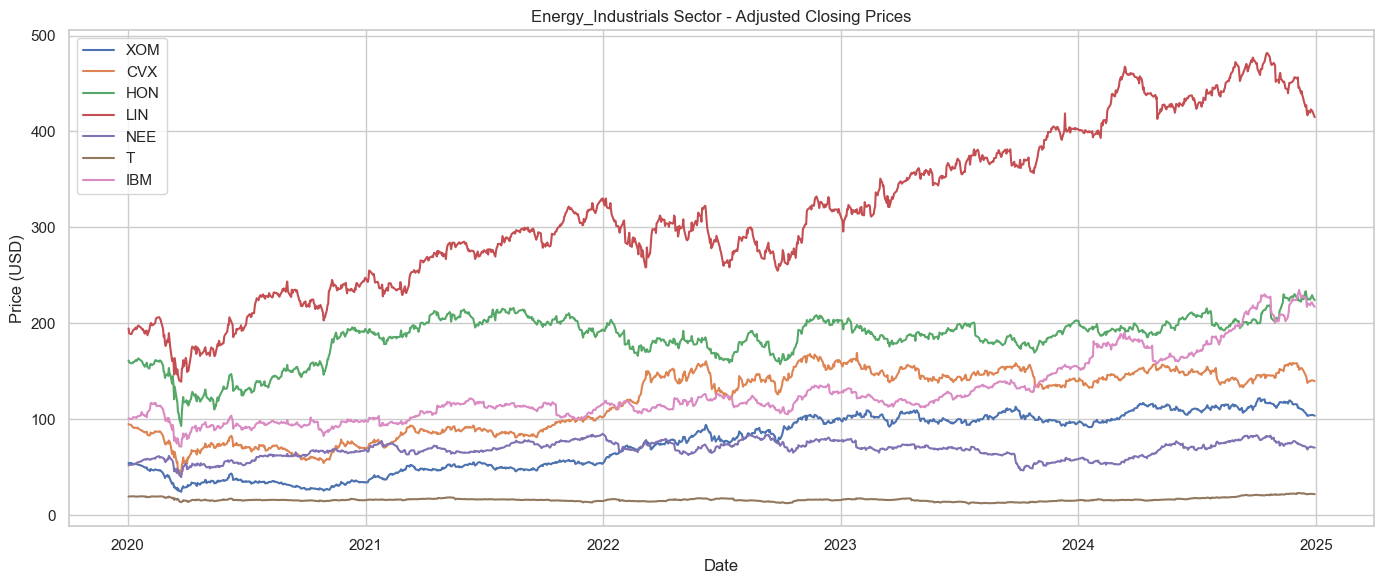

In [33]:
# Producing line plots, showcasing stock trends over time for each category

for category, tickers in categories.items():
    plt.figure(figsize=(14,6))
    
    for ticker in tickers:
        if ticker in data.columns:
            plt.plot(data.index, data[ticker], label=ticker)
    
    plt.title(f'{category} Sector - Adjusted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [38]:
# Calculating daily returns

daily_returns = data.pct_change()

daily_returns = daily_returns.dropna()

print(daily_returns.head())

Ticker          AAPL       ABT       ACN      ADBE      AMGN      AMZN  \
Date                                                                     
2020-01-03 -0.009722 -0.012191 -0.001666 -0.007834 -0.006789 -0.012139   
2020-01-06  0.007968  0.005239 -0.006530  0.005726  0.007674  0.014886   
2020-01-07 -0.004703 -0.005559 -0.021590 -0.000959 -0.009405  0.002092   
2020-01-08  0.016086  0.004076  0.001961  0.013438  0.000756 -0.007809   
2020-01-09  0.021240  0.002668  0.008907  0.007636  0.002980  0.004799   

Ticker           BAC       BMY     BRK-B     CMCSA  ...      PYPL      QCOM  \
Date                                                ...                       
2020-01-03 -0.020763 -0.008841 -0.009676 -0.007935  ... -0.017968 -0.018830   
2020-01-06 -0.001432  0.003186  0.003581 -0.007554  ...  0.012964 -0.005860   
2020-01-07 -0.006600  0.015084 -0.004714  0.010571  ... -0.004538  0.028436   
2020-01-08  0.010110 -0.001095  0.000310  0.010238  ...  0.019604 -0.002922   
2020-01

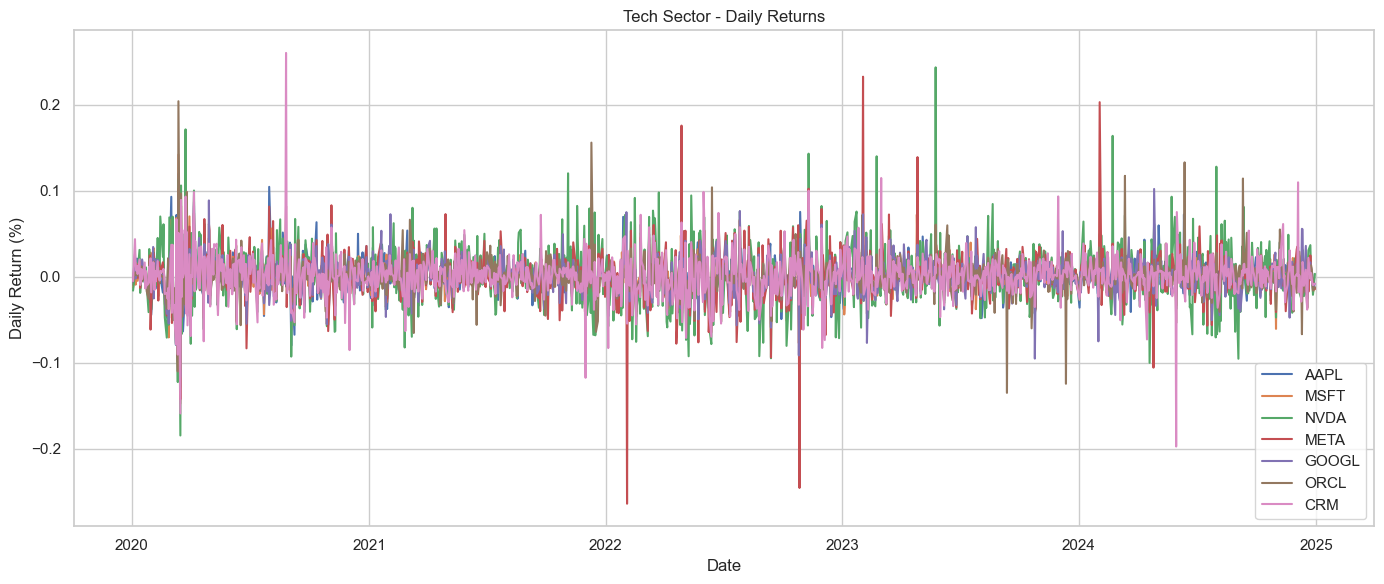

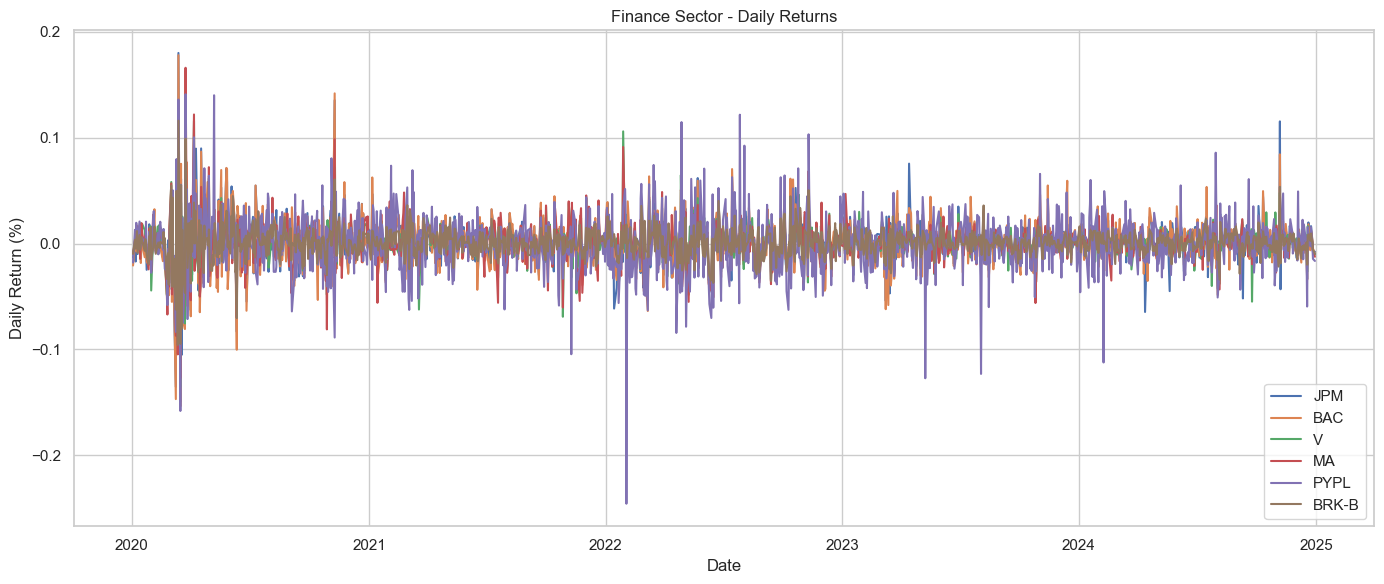

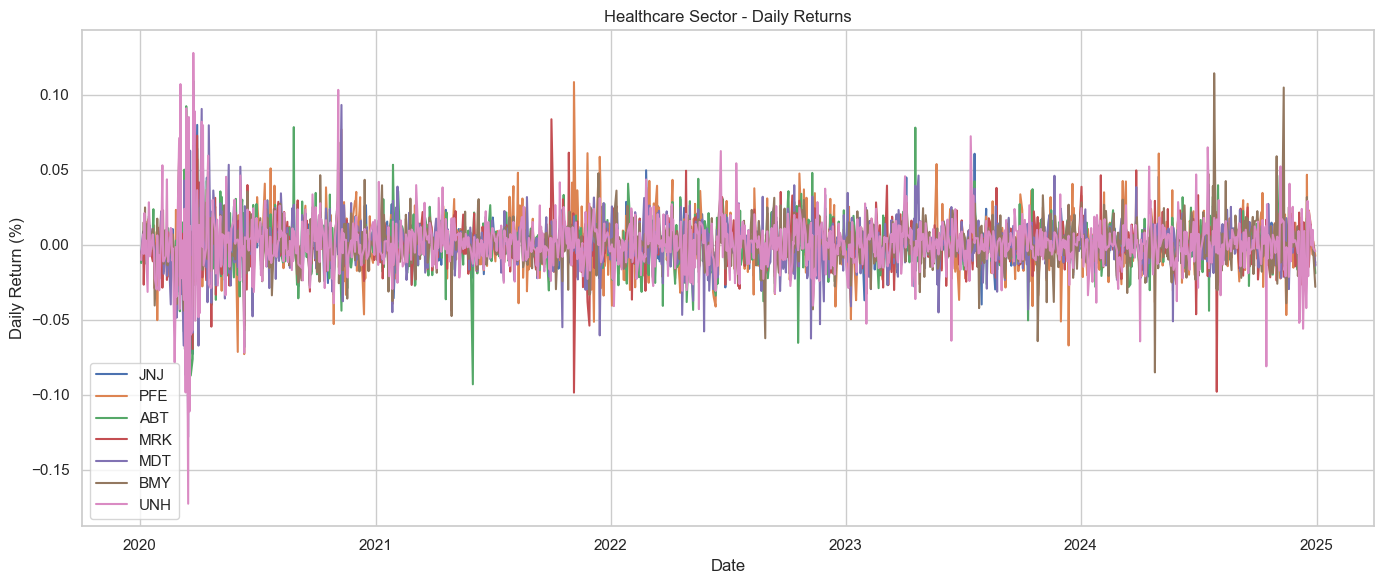

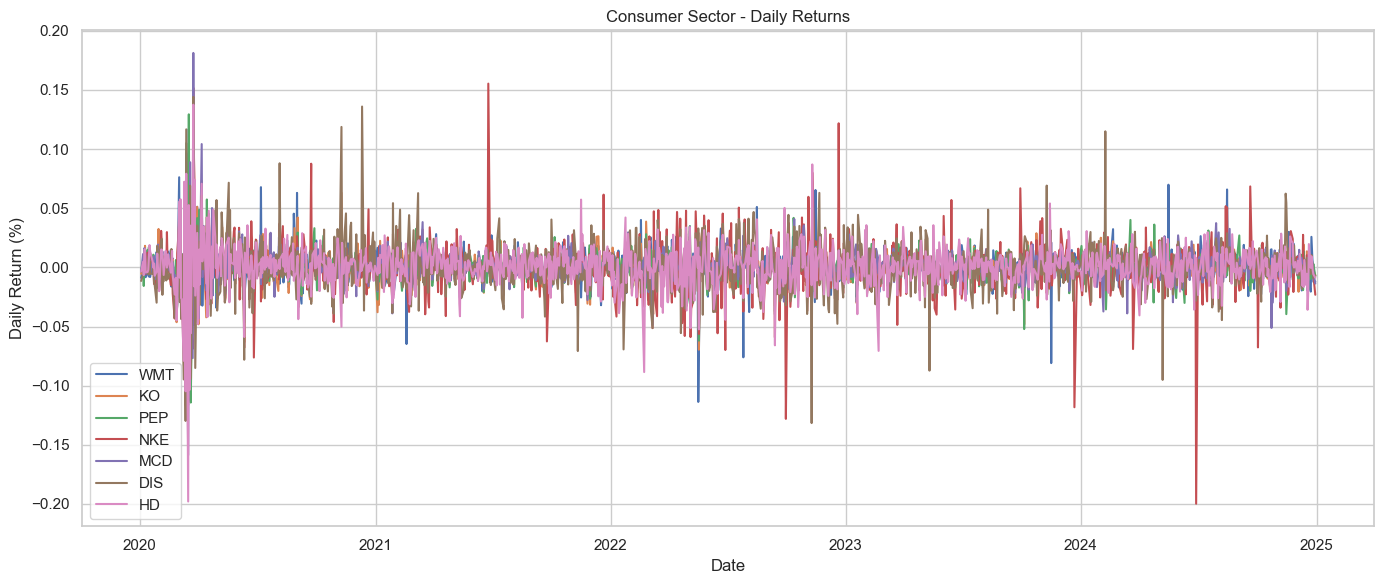

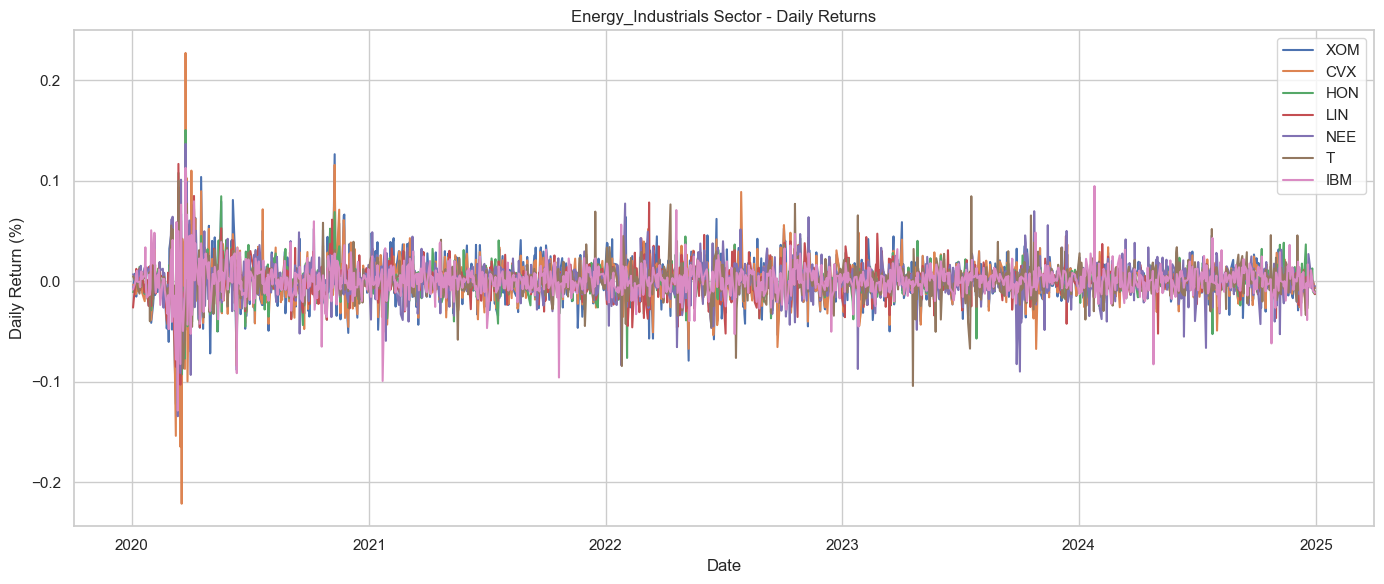

In [41]:
# Visualising volatility based on sector

for category, tickers in categories.items():
    plt.figure(figsize=(14, 6))

    for ticker in tickers:
        if ticker in daily_returns.columns:
            plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)

    plt.title(f'{category} Sector - Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

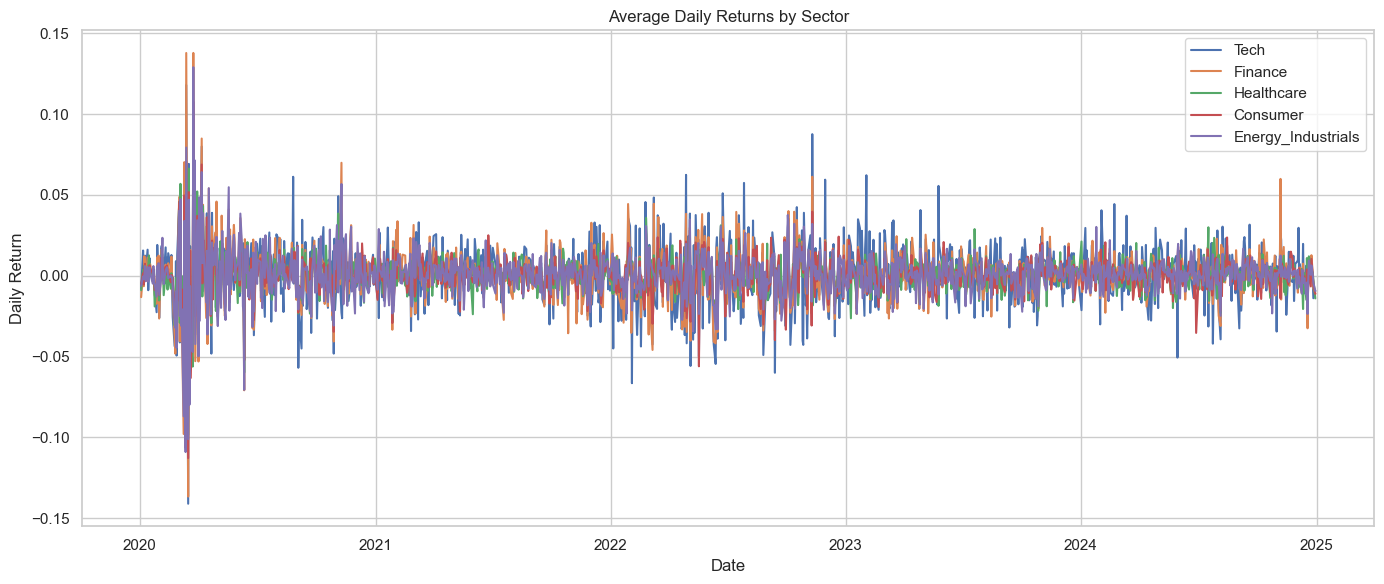

In [49]:
# Plotting average daily returns per sector

sector_returns = {}

for category, tickers in categories.items():
    sector_returns[category] = daily_returns[tickers].mean(axis=1)

# Converting to a dataframe

sector_returns_df = pd.DataFrame(sector_returns)

# Plotting

plt.figure(figsize=(14, 6))

for category in sector_returns_df.columns:
    plt.plot(sector_returns_df.index, sector_returns_df[category], label=category)

plt.title('Average Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

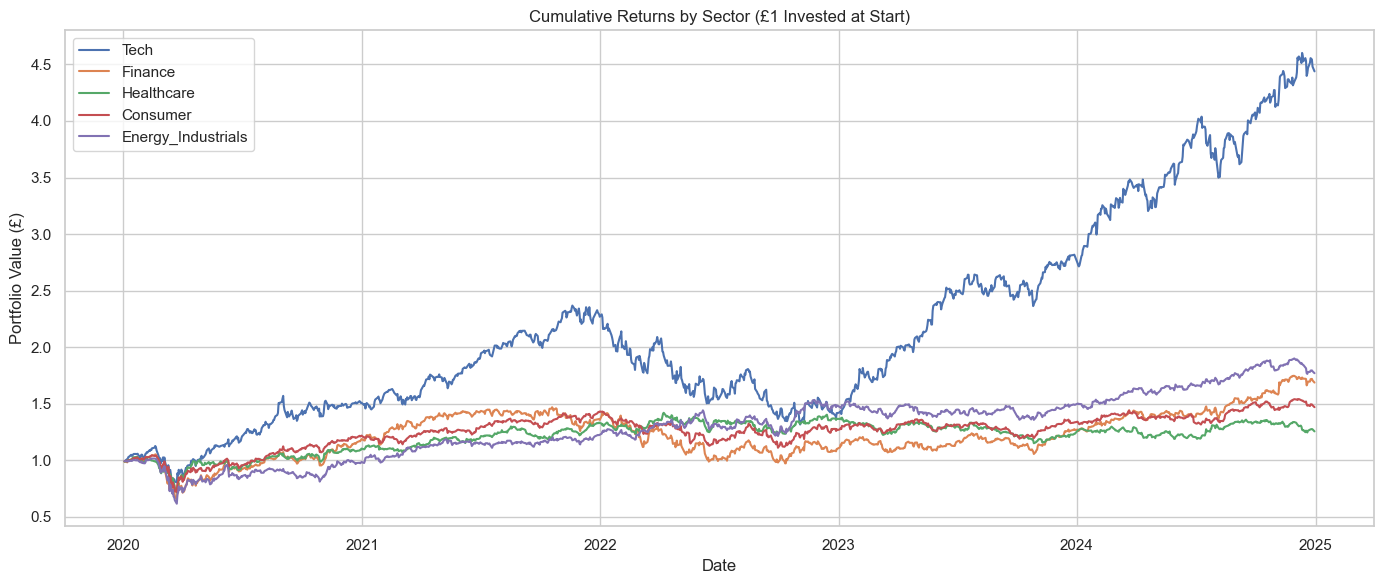

In [52]:
# Calculating cumulative returns from daily returns

cumulative_returns = (1 + sector_returns_df).cumprod()

plt.figure(figsize=(14,6))

for category in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[category], label=category)

plt.title('Cumulative Returns by Sector (£1 Invested at Start)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (£)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

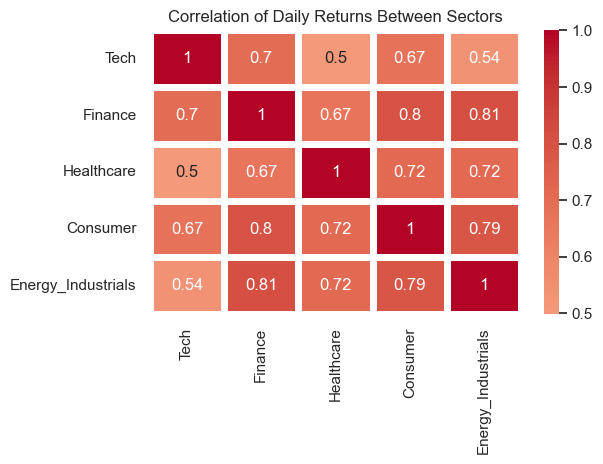

In [56]:
# Computing a correlation matrix of sector returns

sector_corr = sector_returns_df.corr()

# Plotting a heatmap of sector correlations

sns.heatmap(sector_corr, annot=True, cmap='coolwarm', center=0, linewidths=5)

plt.title('Correlation of Daily Returns Between Sectors')
plt.tight_layout()
plt.show()

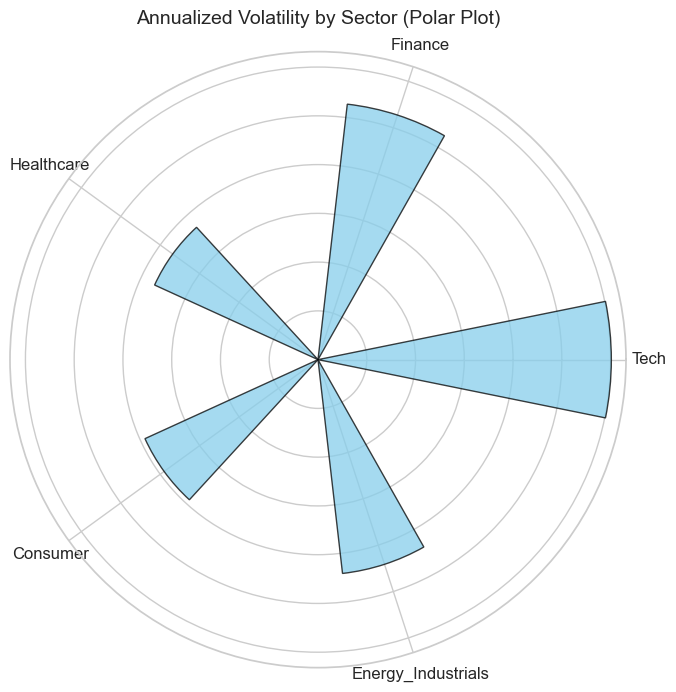

In [61]:
# Calculating daily volatility

daily_volatility = sector_returns_df.std()

# Annualising daily volatility (assuming 252 trading days per annum)

annual_volatility = daily_volatility * (252 ** 0.5)

# Creating a polar bar plot

import numpy as np

sectors = annual_volatility.index.tolist()
vols = annual_volatility.values

angles = np.linspace(0, 2 * np.pi, len(sectors), endpoint=False) # Calculating the angles for each bar

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True)) # Creating a polar plot

bars = ax.bar(angles, vols, width=0.4, bottom=0.0, color='skyblue', edgecolor='black', alpha=0.75) # Creating the bars

ax.set_xticks(angles)
ax.set_xticklabels(sectors, fontsize=12) # Adding sector labels

ax.set_yticklabels([]) # Removing radial labels

ax.set_title('Annualized Volatility by Sector (Polar Plot)', fontsize=14, pad=20)

plt.show()